In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('islander_raw.csv')
df.head()

,Unnamed: 0,index,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
0,0,150,Daichi,Steiner,37,S,1,T,64.2,57.3
1,1,26,Kaito,Carrasco,35,S,2,A,75.0,82.9
2,2,93,Sara,Castro,35,H,2,S,46.0,43.2
3,3,115,Ryouta,Carrasco,49,H,3,S,62.8,54.1
4,4,55,Daichi,Gonzalez,68,H,3,A,41.9,67.4


In [7]:
df.shape

(1188, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1188 non-null   int64  
 1   index             1188 non-null   int64  
 2   first_name        1188 non-null   object 
 3   last_name         1188 non-null   object 
 4   age               1188 non-null   int64  
 5   Happy_Sad_group   1188 non-null   object 
 6   Dosage            1188 non-null   int64  
 7   Drug              1188 non-null   object 
 8   Mem_Score_Before  1188 non-null   float64
 9   Mem_Score_After   1188 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 92.9+ KB


In [13]:
df.isna().sum()

Unnamed: 0          0
index               0
first_name          0
last_name           0
age                 0
Happy_Sad_group     0
Dosage              0
Drug                0
Mem_Score_Before    0
Mem_Score_After     0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [19]:
df.columns

Index(['Unnamed: 0', 'index', 'first_name', 'last_name', 'age',
       'Happy_Sad_group', 'Dosage', 'Drug', 'Mem_Score_Before',
       'Mem_Score_After'],
      dtype='object')

In [25]:
df.drop(columns = ['Unnamed: 0', 'index'], axis = 1,  inplace = True)
df.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
0,Daichi,Steiner,37,S,1,T,64.2,57.3
1,Kaito,Carrasco,35,S,2,A,75.0,82.9
2,Sara,Castro,35,H,2,S,46.0,43.2
3,Ryouta,Carrasco,49,H,3,S,62.8,54.1
4,Daichi,Gonzalez,68,H,3,A,41.9,67.4


In [27]:
df.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After
count,1188.000000,1188.000000,1188.000000,1188.000000
mean,39.530303,1.989899,57.967677,60.922222
std,11.997750,0.816778,15.732766,18.095618
min,24.000000,1.000000,27.200000,27.100000
25%,30.000000,1.000000,46.500000,47.100000
50%,37.000000,2.000000,54.800000,56.750000
75%,48.000000,3.000000,68.800000,73.300000
max,83.000000,3.000000,110.000000,120.000000


In [29]:
df['Improvement'] = df['Mem_Score_After'] - df['Mem_Score_Before']

In [31]:
df.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Improvement
0,Daichi,Steiner,37,S,1,T,64.2,57.3,-6.9
1,Kaito,Carrasco,35,S,2,A,75.0,82.9,7.9
2,Sara,Castro,35,H,2,S,46.0,43.2,-2.8
3,Ryouta,Carrasco,49,H,3,S,62.8,54.1,-8.7
4,Daichi,Gonzalez,68,H,3,A,41.9,67.4,25.5


In [37]:
df.groupby('Happy_Sad_group')[['Mem_Score_Before','Mem_Score_After' , 'Improvement']].mean()

,Mem_Score_Before,Mem_Score_After,Improvement
Happy_Sad_group,,,
H,57.843434,60.576768,2.733333
S,58.091919,61.267677,3.175758


In [39]:
df.groupby('Drug')[['Mem_Score_Before','Mem_Score_After' , 'Improvement']].mean()

,Mem_Score_Before,Mem_Score_After,Improvement
Drug,,,
A,58.211940,67.682090,9.470149
S,58.484848,58.313636,-0.171212
T,57.190769,56.603077,-0.587692


In [63]:
avg_impro_by_gp = df.groupby('Happy_Sad_group')['Improvement'].mean()
avg_impro_by_drug = df.groupby('Drug')['Improvement'].mean()

print('Average memory improvement by Happy/Sad group :', avg_impro_by_gp)
print('Average memory improvement by Drug :', avg_impro_by_drug)

Average memory improvement by Happy/Sad group : Happy_Sad_group
H    2.733333
S    3.175758
Name: Improvement, dtype: float64
Average memory improvement by Drug : Drug
A    9.470149
S   -0.171212
T   -0.587692
Name: Improvement, dtype: float64


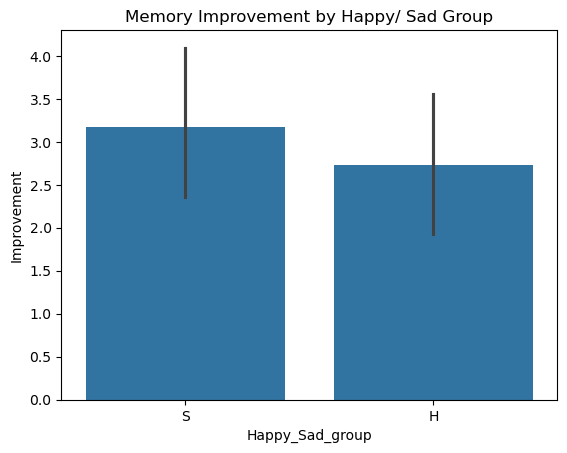

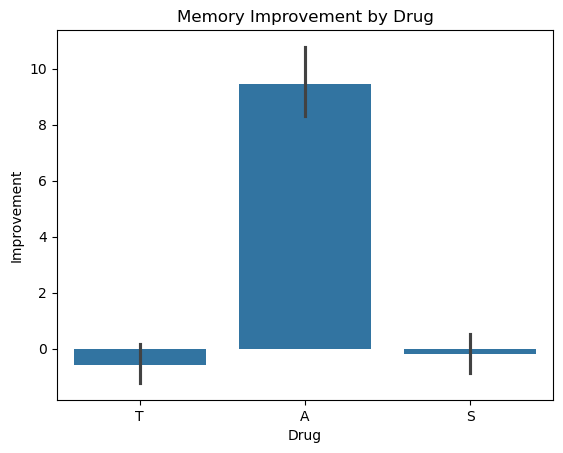

In [61]:
sns.barplot( data = df, x = 'Happy_Sad_group', y = 'Improvement')
plt.title('Memory Improvement by Happy/ Sad Group')
plt.show()

sns.barplot( data = df, x = 'Drug', y = 'Improvement')
plt.title('Memory Improvement by Drug')
plt.show()

In [65]:
df.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Improvement
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,39.530303,1.989899,57.967677,60.922222,2.954545
std,11.997750,0.816778,15.732766,18.095618,10.731928
min,24.000000,1.000000,27.200000,27.100000,-40.400000
25%,30.000000,1.000000,46.500000,47.100000,-3.200000
50%,37.000000,2.000000,54.800000,56.750000,1.700000
75%,48.000000,3.000000,68.800000,73.300000,6.000000
max,83.000000,3.000000,110.000000,120.000000,49.000000


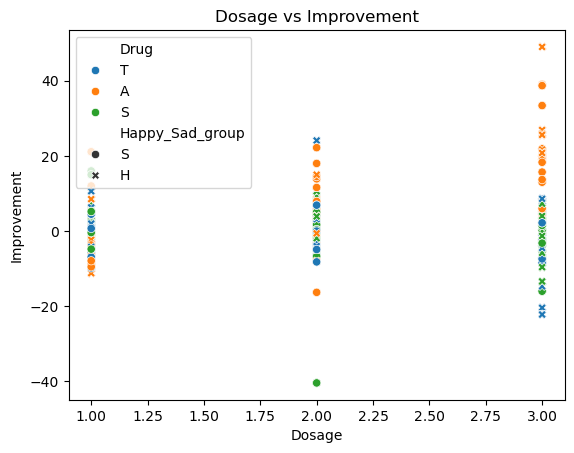

In [85]:
sns.scatterplot(data = df, y = 'Improvement', x = 'Dosage', style = 'Happy_Sad_group' , hue = 'Drug')
plt.title('Dosage vs Improvement')
plt.show()

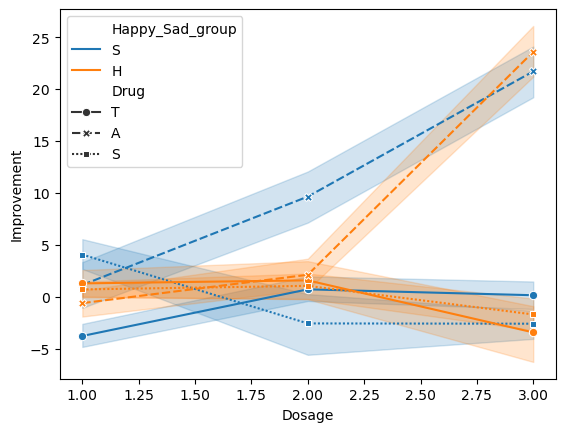

In [87]:
sns.lineplot(data=df, x='Dosage', y='Improvement', hue='Happy_Sad_group', style='Drug', markers=True)
plt.show()

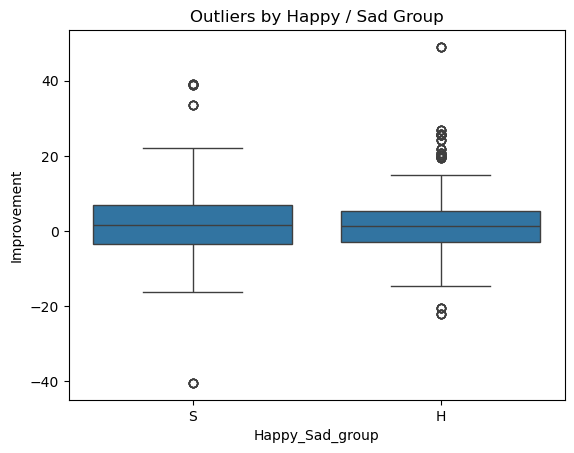

In [89]:
sns.boxplot(data=df, x='Happy_Sad_group', y='Improvement')
plt.title('Outliers by Happy / Sad Group')
plt.show()

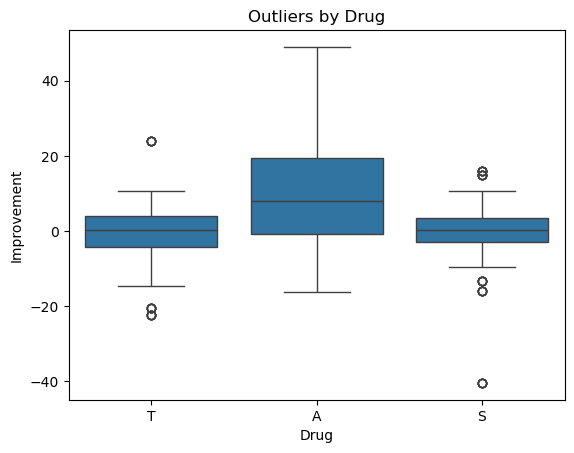

In [91]:
sns.boxplot(data=df, x='Drug', y='Improvement')
plt.title('Outliers by Drug')
plt.show()